https://www.kaggle.com/datasets/khananikrahman/is-an-employee-wearing-safety-gear

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_dir = "/content/drive/MyDrive/study/summer 3rd year/deep learning/IBM/project_v2/data/GearedorNot"


In [19]:
datagen = ImageDataGenerator(rescale=1./255)

data = datagen.flow_from_directory(
    data_dir,
    target_size=(300, 300),  # Resize images to 300x300
    batch_size=500,
    class_mode='binary'  # For multi-class classification
)


Found 355 images belonging to 2 classes.


In [20]:
def plot_images(images_arr,shape_x,shape_y):
    fig, axes = plt.subplots(shape_x,shape_y, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


In [21]:
X, y = next(data)



In [ ]:
X[1].shape

(300, 300, 3)

In [ ]:
plot_images(X[:4],1,4)

In [ ]:
y[:4]  #0:not wear , 1:wear

array([0., 0., 1., 0.], dtype=float32)

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split


X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.2, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)

print("X_train:", X_train.shape)
print("X_cv:", X_cv.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_cv:", y_cv.shape)
print("y_test:", y_test.shape)


X_train: (284, 300, 300, 3)
X_cv: (35, 300, 300, 3)
X_test: (36, 300, 300, 3)
y_train: (284,)
y_cv: (35,)
y_test: (36,)


## decsision tree

# Model 1 :Simple CNN

## CNN using tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300,300,3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (4,4), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),

    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
batch_size=32

In [ ]:

class LossAccuracyHistory(tf.keras.callbacks.Callback):
    def __init__(self):
        super(LossAccuracyHistory, self).__init__()
        self.losses = []
        self.accuracy = []
        self.val_losses = []
        self.val_accuracy = []

    def on_epoch_end(self, epoch, logs=None):
        self.losses.append(logs.get('loss'))
        self.accuracy.append(logs.get('accuracy'))
        self.val_losses.append(logs.get('val_loss'))
        self.val_accuracy.append(logs.get('val_accuracy'))

# Create an instance of the callback
history = LossAccuracyHistory()



In [ ]:
accuracy_threshold=.85
class AccuracyThresholdStopping(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(AccuracyThresholdStopping, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs.get('accuracy')
        if accuracy is not None and accuracy > self.threshold:
            print(f'\nStopping training because accuracy exceeded {self.threshold:.2f}')
            self.model.stop_training = True

accuracy_stopping = AccuracyThresholdStopping(threshold=accuracy_threshold)


In [ ]:
model.fit(X_train, y_train, epochs=16, batch_size=batch_size, validation_data=(X_cv, y_cv),callbacks=[history,accuracy_stopping])
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/16
9/9 ━━━━━━━━━━━━━━━━━━━━ 58s 7s/step - accuracy: 0.4795 - loss: 8.2982 - val_accuracy: 0.4000 - val_loss: 9.5654
Epoch 2/16
9/9 ━━━━━━━━━━━━━━━━━━━━ 81s 6s/step - accuracy: 0.4611 - loss: 8.5914 - val_accuracy: 0.4000 - val_loss: 9.5654
Epoch 3/16
9/9 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.4455 - loss: 8.8400 - val_accuracy: 0.4000 - val_loss: 9.5654
Epoch 4/16
9/9 ━━━━━━━━━━━━━━━━━━━━ 80s 6s/step - accuracy: 0.4768 - loss: 8.3405 - val_accuracy: 0.4000 - val_loss: 9.5654
Epoch 5/16
9/9 ━━━━━━━━━━━━━━━━━━━━ 56s 6s/step - accuracy: 0.4767 - loss: 8.3424 - val_accuracy: 0.4000 - val_loss: 9.5654
Epoch 6/16
9/9 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.4453 - loss: 8.8438 - val_accuracy: 0.4000 - val_loss: 9.5654
Epoch 7/16
9/9 ━━━━━━━━━━━━━━━━━━━━ 80s 6s/step - accuracy: 0.4396 - loss: 8.9340 - val_accuracy: 0.4000 - val_loss: 9.5654
Epoch 8/16
9/9 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.4675 - loss: 8.4886 - val_accuracy: 0.4000 - val_loss: 9.5654
Epoch 9/

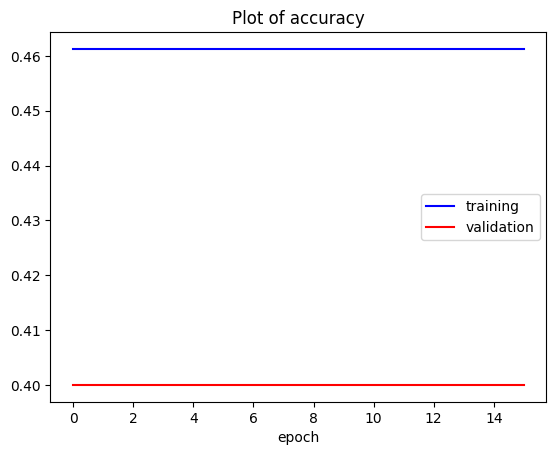

In [ ]:
import matplotlib.pyplot as plt


# Create the plot
plt.figure()

# Plot the first line
plt.plot(range(len(history.losses)), history.accuracy, label='training', color='blue')

# Plot the second line
plt.plot(range(len(history.losses)), history.val_accuracy, label='validation', color='red')

plt.xlabel('epoch')
plt.title('Plot of accuracy')
plt.legend()
plt.show()


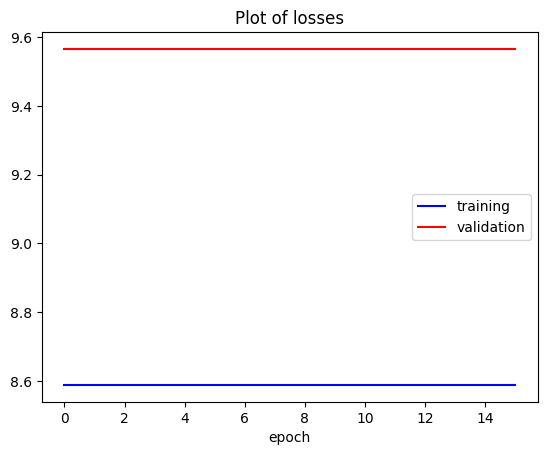

In [ ]:
import matplotlib.pyplot as plt


# Create the plot
plt.figure()

# Plot the first line
plt.plot(range(len(history.losses)), history.losses, label='training', color='blue')

# Plot the second line
plt.plot(range(len(history.losses)), history.val_losses, label='validation', color='red')

plt.xlabel('epoch')
plt.title('Plot of losses')
plt.legend()
plt.show()


by expermenting with parameters ,accuracy and low is still small and not changing (in train so underfit) ,so we will choose another model

## Try Another architecture (Using pytorch)

In [ ]:
!pip3 install torch torchvision torchaudio


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F


In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        # This method is used to define the structure and components of the neural network
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=0)  #(1,32) mean :Input: 3 channel, Output: 32 channels
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=0) # Input: 32 channels, Output: 64 channels
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=0) # Input: 64 channels, Output: 128 channels
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0) #note it called many times (general pool of same dimensions)
        self.fc1 = nn.Linear(1, 512)  # intialize it to 1 neuron
        self.fc2 = nn.Linear(512, 1)  # 1 output classes


    def forward(self, x):
        # This method defines the forward pass of the network, specifying how the data flows through the layers defined in __init__
        x = self.pool((self.conv1(x)))#nn.ReLU,Type: This is a class-based module,Usage: Typically used as a layer in neural network models.
        x = self.pool((self.conv2(x)))
        x = self.pool((self.conv3(x)))
        x = torch.flatten(x, 1)
        self.fc1 = nn.Linear(x.size(1), 512) #updating to correct dimensions
        x = F.relu(self.fc1(x))#F.relu Type: This is a functional interface ,Usage: Typically used as a functional operation within the forward method or other functions. ,you can use the other ,but i preferred tp be sane
        x = self.fc2(x)
        return x


In [ ]:
from torchsummary import summary

model = SimpleCNN()
summary(model, (3, 300,300))  # (Channels, Height, Width)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 298, 298]             896
         MaxPool2d-2         [-1, 32, 149, 149]               0
            Conv2d-3         [-1, 64, 147, 147]          18,496
         MaxPool2d-4           [-1, 64, 73, 73]               0
            Conv2d-5          [-1, 128, 71, 71]          73,856
         MaxPool2d-6          [-1, 128, 35, 35]               0
            Linear-7                    [-1, 1]             513
Total params: 93,761
Trainable params: 93,761
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 1.03
Forward/backward pass size (MB): 46.37
Params size (MB): 0.36
Estimated Total Size (MB): 47.76
----------------------------------------------------------------


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = SimpleCNN().to(device)
criterion = criterion = nn.BCEWithLogitsLoss()
# Suitable for binary classification with logits (sigmoid), nn.CrossEntropyLoss() default ------->output sigmoid
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
## train model
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.reshape(1,1))
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}')


Epoch [1/5], Loss: 0.7061
Epoch [2/5], Loss: 0.7037
Epoch [3/5], Loss: 0.7086
Epoch [4/5], Loss: 0.7236
Epoch [5/5], Loss: 0.7383


In [ ]:
#Evaluation
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')


Accuracy of the network on the 10000 test images: 55.56%


from simple CNN with pytorch or  tensorflow , the accuracy is not very good ,it's about 55%

## Transfer Learning with VGG

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load the VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(300,300, 3)) # initialize the model with weights that have been pre-trained on the ImageNet


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Freeze the layers of the VGG16 base model
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
# Add custom layers
x = base_model.output
x = Flatten()(x)  # Flatten the output from the convolutional base
x = Dense(512, activation='relu')(x)  # Add a fully connected layer
x = Dense(256, activation='relu')(x)  # Add another fully connected layer
predictions = Dense(1, activation='sigmoid')(x)

# Create the full model
VGG_model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:

class LossAccuracyHistory(tf.keras.callbacks.Callback):
    def __init__(self):
        super(LossAccuracyHistory, self).__init__()
        self.losses = []
        self.accuracy = []
        self.val_losses = []
        self.val_accuracy = []

    def on_epoch_end(self, epoch, logs=None):
        self.losses.append(logs.get('loss'))
        self.accuracy.append(logs.get('accuracy'))
        self.val_losses.append(logs.get('val_loss'))
        self.val_accuracy.append(logs.get('val_accuracy'))

# Create an instance of the callback
history = LossAccuracyHistory()

accuracy_threshold=.85
class AccuracyThresholdStopping(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(AccuracyThresholdStopping, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs.get('accuracy')
        if accuracy is not None and accuracy > self.threshold:
            print(f'\nStopping training because accuracy exceeded {self.threshold:.2f}')
            self.model.stop_training = True

accuracy_stopping = AccuracyThresholdStopping(threshold=accuracy_threshold)


In [ ]:
batch_size=32

VGG_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [ ]:
VGG_model.fit(X_train, y_train, epochs=16, batch_size=batch_size, validation_data=(X_cv, y_cv),callbacks=[history,accuracy_stopping])
test_loss, test_acc = VGG_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/16
9/9 ━━━━━━━━━━━━━━━━━━━━ 325s 36s/step - accuracy: 0.5503 - loss: 2.4634 - val_accuracy: 0.7429 - val_loss: 1.3706
Epoch 2/16
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31s/step - accuracy: 0.8332 - loss: 0.5540 
Stopping training because accuracy exceeded 0.85
9/9 ━━━━━━━━━━━━━━━━━━━━ 320s 36s/step - accuracy: 0.8390 - loss: 0.5371 - val_accuracy: 0.9143 - val_loss: 0.2384
2/2 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9711 - loss: 0.1301
Test accuracy: 0.9722222089767456


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def getConFusionMatrix(X_,y_):
    y_train_pred=VGG_model.predict(X_)
    y_train_pred = (y_train_pred > .5).astype(int)
    cm = confusion_matrix(y_, y_train_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
                xticklabels=['Not Wear(0)', 'Wear (1)'],
                yticklabels=['Not Wear(0)', 'Wear (1)'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 295s 31s/step


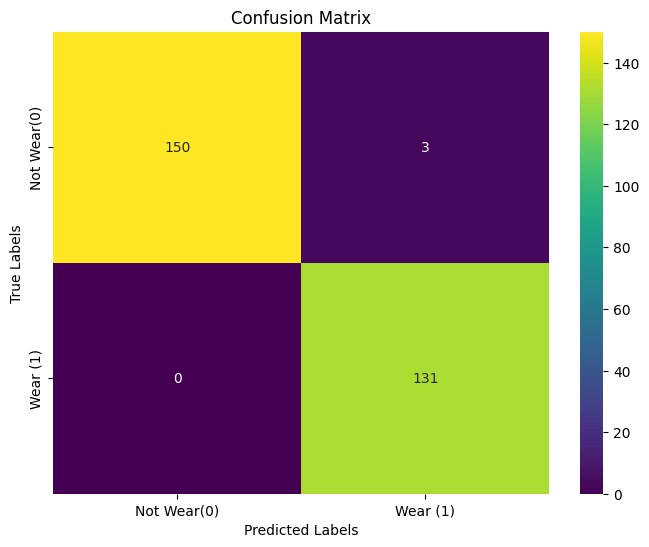

In [ ]:
getConFusionMatrix(X_train,y_train)

2/2 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step


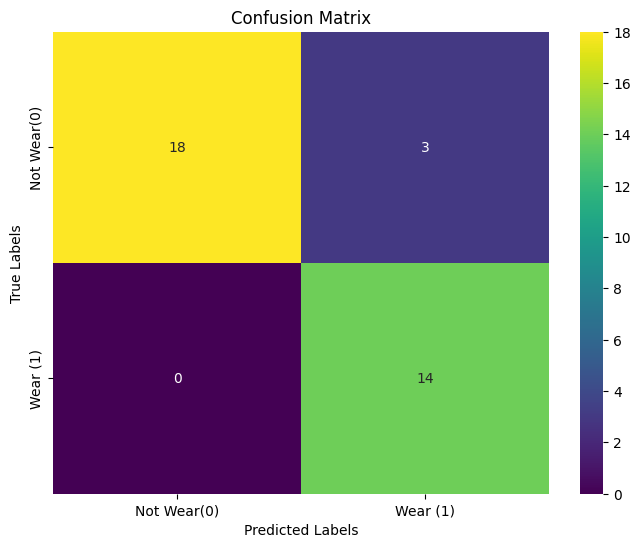

In [ ]:
getConFusionMatrix(X_cv,y_cv)

2/2 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step


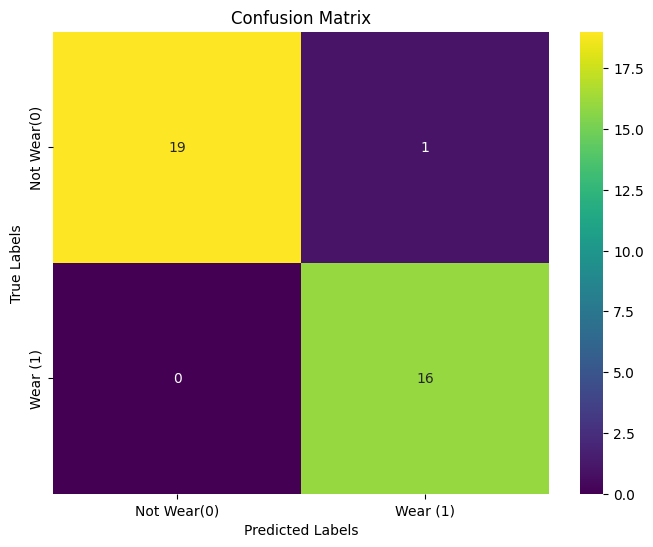

In [ ]:
getConFusionMatrix(X_test,y_test)

In [ ]:
VGG_model.save("VGG_model.h5")

## Now ,test model using images from internet

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
model = tf.keras.models.load_model("VGG_model.h5")

def predict_uploaded_image():
  for image_i in uploaded.keys():
    print("___________________________________________________________________")
    img = image.load_img(image_i, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x=x/255

    predication = model.predict(x, batch_size=10)[0]


    print(image_i+":")
    print("Wearing" if predication > 0.5 else "Not Wearing")
    print(f"Probability :{predication * 100}")#recalculte ???????


In [ ]:
from google.colab import files
uploaded = files.upload()
predict_uploaded_image()

Saving 0b108021-4be9-46ae-9781-eeb348fb1d69.jpeg to 0b108021-4be9-46ae-9781-eeb348fb1d69.jpeg
Saving 0c04e986-cce2-490f-af83-f0210ba66e4a.jpg to 0c04e986-cce2-490f-af83-f0210ba66e4a.jpg
Saving 0c76fcf7-cc33-4ef3-a89f-32c288bfb811.jpg to 0c76fcf7-cc33-4ef3-a89f-32c288bfb811.jpg
Saving 1ad4701d-e916-4988-8490-f9aff7479edb.jpg to 1ad4701d-e916-4988-8490-f9aff7479edb.jpg
Saving 2aad7255-bc09-4006-8c68-bc2dfc4019db.jpg to 2aad7255-bc09-4006-8c68-bc2dfc4019db.jpg
Saving 3a861ea9-0a73-42a8-b086-3c8b6e021102.jpg to 3a861ea9-0a73-42a8-b086-3c8b6e021102.jpg
Saving 3c8bfb43-10fb-4e95-b096-51bcb28a44e8.jpg to 3c8bfb43-10fb-4e95-b096-51bcb28a44e8.jpg
Saving 3d9a1008-cdfd-4f95-8e34-0cc58755912f.jpg to 3d9a1008-cdfd-4f95-8e34-0cc58755912f.jpg
___________________________________________________________________
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 852ms/step
0b108021-4be9-46ae-9781-eeb348fb1d69.jpeg:
Not Wearing
Probability :[2.2356323e-08]
___________________________________________________________________
1/1

## Res Net

## Mobile Net
if best model ,we may use to deploy on camera later

In [35]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(300,300, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.7)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.7)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Define the model
Mobile_model = Model(inputs=base_model.input, outputs=predictions)

<ipython-input-35-96810c441f78>:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(300,300, 3))


In [36]:

class LossAccuracyHistory(tf.keras.callbacks.Callback):
    def __init__(self):
        super(LossAccuracyHistory, self).__init__()
        self.losses = []
        self.accuracy = []
        self.val_losses = []
        self.val_accuracy = []

    def on_epoch_end(self, epoch, logs=None):
        self.losses.append(logs.get('loss'))
        self.accuracy.append(logs.get('accuracy'))
        self.val_losses.append(logs.get('val_loss'))
        self.val_accuracy.append(logs.get('val_accuracy'))

# Create an instance of the callback
history = LossAccuracyHistory()

accuracy_threshold=.85
class AccuracyThresholdStopping(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(AccuracyThresholdStopping, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs.get('accuracy')
        if accuracy is not None and accuracy > self.threshold:
            print(f'\nStopping training because accuracy exceeded {self.threshold:.2f}')
            self.model.stop_training = True

accuracy_stopping = AccuracyThresholdStopping(threshold=accuracy_threshold)
batch_size=32

Mobile_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [37]:
Mobile_model.fit(X_train, y_train, epochs=16, batch_size=batch_size, validation_data=(X_cv, y_cv),callbacks=[history,accuracy_stopping])
test_loss, test_acc = VGG_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/16
9/9 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.5729 - loss: 10.6682 - val_accuracy: 0.8571 - val_loss: 2.5913
Epoch 2/16
9/9 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.8197 - loss: 11.7362 - val_accuracy: 0.8571 - val_loss: 8.2188
Epoch 3/16
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8399 - loss: 7.3961
Stopping training because accuracy exceeded 0.85
9/9 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.8432 - loss: 7.3700 - val_accuracy: 0.9143 - val_loss: 2.1230
2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.5000 - loss: 0.8730
Test accuracy: 0.5


In [40]:
Mobile_model.save("MobileNet.h5")

## Augmenting data and retrain on VGG

using same way as above The augmentation won't increase the number of images loaded; instead, it will provide different versions of the images each epoch.
 so instead we will divide data in training itself (another approach by using just validation-train data , no test and use validation during  training)